## Neste tutorial, você aprenderá como detectar automaticamente o COVID-19 em um conjunto de dados de imagem de raio-X criado à mão usando Keras, TensorFlow e Deep Learning.

## Simplificando: você não precisa de um diploma em medicina para causar impacto no campo da medicina  - profissionais de aprendizado profundo que trabalham em estreita colaboração com médicos e profissionais da área médica podem resolver problemas complexos, salvar vidas e tornar o mundo um lugar melhor.

## Como o COVID-19 pode ser detectado em imagens de raios-X?

In [312]:
from imutils import paths
import pandas as pd
import datetime
import random
import shutil
import uuid
import cv2
import os


In [ ]:
# !pip install pillow

In [313]:
def getDiretorio(tipo):
    retorno = ""
    if(tipo =="MaquinaLocal"):
        retorno = r'D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto'
    
    if(tipo =="GitHub"):
        retorno = r'https://github.com/ieee8023/covid-chestxray-dataset/blob/master/'

    if(tipo =="GoogleDrive"):
       retorno=r'/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/'
       
    
    return retorno
    

In [314]:
diretorio_raiz = getDiretorio("MaquinaLocal")
diretorio_dataset =r"{0}/{1}".format(diretorio_raiz,'dataset')
diretorio_imagem_covid =r"{0}/{1}".format(diretorio_dataset,'covid')
diretorio_pneumonia_normal =r"{0}/{1}".format(diretorio_dataset,'normal')
diretorio_imagens_notebook =r"{0}/{1}".format(diretorio_raiz,'Imagens_notebook')
diretorio_save_models =r"{0}/{1}".format(diretorio_raiz,'models')
diretorio_save_model_imagens =r"{0}/{1}".format(diretorio_save_models,'imagens')
print(diretorio_raiz)
print(diretorio_dataset)
print(diretorio_imagem_covid)
print(diretorio_pneumonia_normal)
print(diretorio_imagens_notebook)
print(diretorio_save_models)
print(diretorio_save_model_imagens)



D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/dataset
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/dataset/covid
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/dataset/normal
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/Imagens_notebook
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/models
D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/models/imagens


## O conjunto de dados de imagem de raios-X COVID-19 que usaremos para este tutorial foi curado pelo Dr. Joseph Cohen , um pós-doutorado na Universidade de Montreal
https://josephpcohen.com/w/

## git hub dos dados
https://josephpcohen.com/w/public-covid19-dataset/

https://github.com/ieee8023/covid-chestxray-dataset

In [315]:
source_dir_metadata = r'D:/Repos/datasetsGitHub/covid-chestxray-dataset/metadata.csv'
source_dir_kaggle_Covid =r'D:/Repos/datasetsGitHub/covid-chestxray-dataset/images'
source_dir_kaggle_pneumonia =r'D:/Repos/pneumonia-chest_xray'



In [316]:
if not os.path.exists(diretorio_imagem_covid):
    os.mkdir(diretorio_imagem_covid)

if not os.path.exists(diretorio_pneumonia_normal):
    os.mkdir(diretorio_pneumonia_normal)


In [317]:
df_metadata  = pd.read_csv(source_dir_metadata)

In [318]:
df_metadata.shape

(565, 28)

In [319]:
df_metadata =  df_metadata[["patientid","sex","age","location", "finding", "modality","filename","view"]]

df_metadata.columns = ["patientId","sexo","idade","localidade","prognostico","tipoExame","imagem","posicao_imagem"]

In [320]:
prognostico_map_dataframe ={
    "COVID-19" : 1,
    "COVID-19, ARDS":2,
    "Streptococcus" :3,
    "SARS" :4,
    "Pneumocystis" :5,
    "E.Coli" :6,
    "No Finding" :7,
    "Chlamydophila" :8,
    "Legionella" :9,
    "Klebsiella" :10
}

df_metadata['indicadorPrognostico'] = df_metadata['prognostico'].map(prognostico_map_dataframe)

In [321]:
df_metadata.head(2)

,patientId,sexo,idade,localidade,prognostico,tipoExame,imagem,posicao_imagem,indicadorPrognostico
0,2,M,65.0,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",COVID-19,X-ray,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,PA,1.0
1,2,M,65.0,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",COVID-19,X-ray,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,PA,1.0


PA View of X ray

In [322]:
class ConfiguracoesRedeNeuralCovid(object):
    def __init__(self):
        self.IdModelo =""
        self.NomeModelo=""
        self.TamanhoModelo=""
        self.EPOCHS=""
        self.INIT_LR=""
        self.BS=""
        self.IMAGE_SIZE=""
        self.Descricao=""
        self.DataCriacao=""
        self.QuantidadeImagensTotais=""
        self.QuantidadeImagensCovid=""
        self.QuantidadeImagensPneumonia=""
        self.QuantidadeImagensNormal =""
        self.QuantidadeImagensTrainX=""
        self.QuantidadeImagensTestX=""
        self.QuantidadeImagensTrainY=""
        self.QuantidadeImagensTestY=""
        self.Rotation_range=""
        self.Fill_mode=""
        self.Test_size=""
        self.TipoCNN=""
        self.NomeNoteBook = ""

    def to_dict(self):
        return {
            'IdModelo' : self.IdModelo,
            'NomeModelo' :self.NomeModelo,
            'TamanhoModelo':self.TamanhoModelo,
            'EPOCHS' :self.EPOCHS,
            'INIT_LR' :self.INIT_LR,
            'BS' : self.BS,
            'IMAGE_SIZE' :self.IMAGE_SIZE,
            'Descricao' :self.Descricao,
            'DataCriacao' :self.DataCriacao,
            'QuantidadeImagensTotais' :self.QuantidadeImagensTotais,
            'QuantidadeImagensCovid' :self.QuantidadeImagensCovid,
            'QuantidadeImagensPneumonia' :self.QuantidadeImagensPneumonia,
            'QuantidadeImagensNormal' :self.QuantidadeImagensNormal,
            'QuantidadeImagensTrainX' :self.QuantidadeImagensTrainX,
            'QuantidadeImagensTestX' :self.QuantidadeImagensTestX,
            'QuantidadeImagensTrainY' :self.QuantidadeImagensTrainY,
            'QuantidadeImagensTestY' :self.QuantidadeImagensTestY,
            'Rotation_range' :self.Rotation_range,
            'fill_mode' :self.Fill_mode,
            'test_size' :self.Test_size,
            "TipoCNN" :self.TipoCNN,
            "NomeNoteBook" :self.NomeNoteBook

        }
    # Métodos são funções, que recebem como parâmetro atributos do objeto criado    
    def getInformacoes(self):
        print('Modelo {0}|{1} criado em {2} |com {3} EPOCHS|{4} IMG_COVID| {5} IMGPNEU|{6} IMGNORMAL'.
        format(self.IdModelo,self.NomeModelo,str(self.DataCriacao),self.EPOCHS,self.QuantidadeImagensCovid,self.QuantidadeImagensPneumonia,self.QuantidadeImagensNormal))

In [324]:
labels =[]
lista_imagens_erro = []
lista_imagens_com_Covid = []
lista_imagens_com_pneumonia_normal = []
lista_imagens_com_pneumonia_pneumonia = []
lista_tuplas_imagens =[]

In [329]:
df_metadata["tipoExame"].value_counts()

X-ray    481
CT        84
Name: tipoExame, dtype: int64

In [330]:
df_metadata["posicao_imagem"].value_counts()


PA               252
AP Supine         86
Axial             68
AP                65
?                 46
L                 31
Coronal           16
AP semi erect      1
Name: posicao_imagem, dtype: int64

In [331]:

df_covid =  df_metadata.query('indicadorPrognostico == 1 and posicao_imagem =="PA"')

print(len(df_covid))


182


In [332]:
config= ConfiguracoesRedeNeuralCovid()
config.DataCriacao = datetime.datetime.now().strftime("%dd/%mm/%YYYY, %H:%M:%S")
config.IMAGE_SIZE = (224,224)
config.INIT_LR = 1e-3
config.EPOCHS = 50
config.BS = 8
config.IdModelo = uuid.uuid1()
config.Rotation_range=25
config.Fill_mode= str("nearest")
config.Test_size=0.30
config.TipoCNN ="VGG16"
config.NomeNoteBook = "Artigo_V2"

config.NomeModelo ="Model_{0}_{1}_{2}_EPOCHS".format(config.TipoCNN,config.NomeNoteBook,config.EPOCHS) 

In [333]:
lista_imagens_com_Covid =[]
lista_tuplas_imagens = []


for row in df_covid[["prognostico","imagem"]].iterrows():
    imagen_name = row[1].imagem
    prognostico = row[1].prognostico
    full_name = "{0}/{1}".format(diretorio_imagem_covid,imagen_name)
    image = cv2.imread(full_name)
    if(image is None):
        lista_imagens_erro.append(imagen_name)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, config.IMAGE_SIZE)
        lista_tuplas_imagens.append((prognostico,image))
        lista_imagens_com_Covid.append(full_name)

print(len(lista_imagens_com_Covid))        

182


In [334]:
imagens_pneumonia_normal =  list(paths.list_images(diretorio_pneumonia_normal))

imagens_pneumonia_normal = [path.replace('\\','/') for path in imagens_pneumonia_normal]

imagens_pneumonia_normal[0:2]

['D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/dataset/normal/IM-0001-0001.jpeg',
 'D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto/dataset/normal/IM-0003-0001.jpeg']

In [335]:
lista_imagens_com_pneumonia_normal = []

for item in imagens_pneumonia_normal:
    image = cv2.imread(item)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is None):
        lista_imagens_erro.append(item)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, config.IMAGE_SIZE)
        lista_tuplas_imagens.append((prognostico,image))
        lista_imagens_com_pneumonia_normal.append(item)
    

In [336]:
config.QuantidadeImagensCovid =len(lista_imagens_com_Covid)
config.QuantidadeImagensPneumonia =len(lista_imagens_com_pneumonia_normal)
config.QuantidadeImagensTotais = len(lista_tuplas_imagens)

print("Imagens Covid  {0} total de {1:.2f} %".format(len(lista_imagens_com_Covid),len(lista_imagens_com_Covid) / (len(lista_tuplas_imagens)) * 100))
print("Imagens Pneumonia Normais  {0} total de {1:.2f} %".format(len(lista_imagens_com_pneumonia_normal),len(lista_imagens_com_pneumonia_normal) / (len(lista_tuplas_imagens)) * 100)) 

print("Total de Imagens {0}".format(len(lista_tuplas_imagens)))
 

Imagens Covid  182 total de 43.75 %
Imagens Pneumonia Normais  234 total de 56.25 %
Total de Imagens 416


## recuperar imagens do diretorio de pneumonia


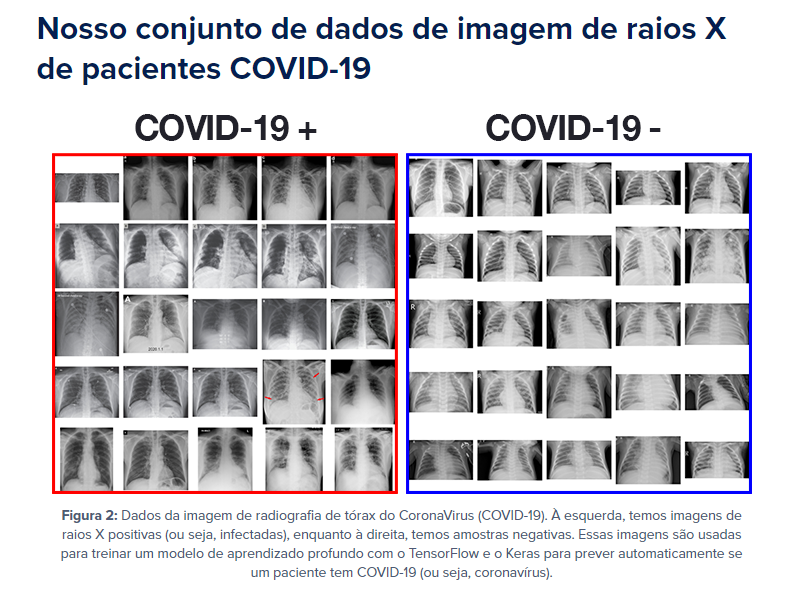

In [337]:

from IPython.display import Image
Image('{0}/{1}'.format(diretorio_imagens_notebook,'imagensVariosRx.PNG'))

In [338]:
diagnostico_map= {'covid' : 1, 'normal' : 0}

## importando os pacotes 

In [339]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

## criação da arquitera da rede neural


In [260]:
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# # model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.50))
# model.add(Dense(1,activation='sigmoid'))


# model.compile(loss = keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])

## Compilação da rede neural

In [340]:
# model.summary()

## generate train data gem  

## executando a  tecnica de  data augmentation

### Para garantir a generalização do nosso modelo, realizamos o aumento de dados definindo a rotação aleatória da imagem em 15 graus no sentido horário ou anti-horário.

In [341]:
labels = [item[0] for item in lista_tuplas_imagens]



In [342]:
distinct_labels  = set(labels)

distinct_labels


{'COVID-19', 'normal'}

In [343]:

labels = np.array(labels)


In [344]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


In [345]:
lista_imagens =[item[1] for item in lista_tuplas_imagens]

In [346]:
lista_imagens = np.array(lista_imagens) / 255.0

## fazendo a divisão do data-set em test e treino



In [348]:
config.Test_size = 0.30

In [349]:
(trainX, testX, trainY, testY) = train_test_split(lista_imagens, labels, train_size = config.Test_size, stratify=labels, random_state=42)

In [351]:

trainAug = ImageDataGenerator(rotation_range=config.Rotation_range,fill_mode= config.Fill_mode)

In [352]:
print("trainX shape {0}".format(trainX[0].shape))
print("testX shape {0}".format(testX[0].shape))
print("trainY shape {0}".format(trainY[0].shape))
print("testY shape {0}".format(testY[0].shape))


config.QuantidadeImagensTestX = len(testX)
config.QuantidadeImagensTestY = len(testY)
config.QuantidadeImagensTrainX = len(trainX)
config.QuantidadeImagensTrainY = len(trainY)
print("\n")
print("quantidade registros em  trainX {0}".format(config.QuantidadeImagensTrainX))
print("quantidade registros em  testX {0}".format(config.QuantidadeImagensTestX))
print("quantidade registros em  trainY {0}".format(config.QuantidadeImagensTrainY))
print("quantidade registros em  testY {0}".format(config.QuantidadeImagensTestY))

trainX shape (224, 224, 3)
testX shape (224, 224, 3)
trainY shape (2,)
testY shape (2,)


quantidade registros em  trainX 124
quantidade registros em  testX 292
quantidade registros em  trainY 124
quantidade registros em  testY 292


### instanciamentos a rede VGG16 com pesos pré-treinados no ImageNet, deixando  o head da camada FC.

A partir daí, construímos um nova camanda totalmente conectada, consistindo em POOL => FC = SOFTMAX em cima do VGG16 

Em seguida, congelamos o CONV pesos do VGG16, de modo que apenas oFCa cabeça da camada será treinada ( Linhas 101-102 ); isso completa nossa configuração de ajuste fino.

In [353]:
# carregar a rede VGG16, garantindo que os conjuntos de camadas FC principais sejam deixados
# fora
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# construa o head  do modelo que será colocado em cima d0 modelo base
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# coloque o modelo FC principal sobre o modelo base (isso se tornará
# o modelo real que vamos treinar)
model = Model(inputs=baseModel.input, outputs=headModel)
# passa por todas as camadas no modelo base e congela-as para que elas
# * not * seja atualizado durante o primeiro processo de treinamento
for layer in baseModel.layers:
	layer.trainable = False

### Agora estamos prontos para compilar e treinar nosso modelo de aprendizado

In [354]:
print(float(config.Rotation_range))
print(config.EPOCHS)
print(config.INIT_LR)
print(config.BS)

25.0
50
0.001
8


In [356]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=config.INIT_LR, decay=config.INIT_LR / config.EPOCHS) 
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=config.BS),
	steps_per_epoch=len(trainX) // config.BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // config.BS,
	epochs=config.EPOCHS)

[INFO] compiling model...
[INFO] training head...
  ...
    to  
  ['...']
Train for 15 steps, validate on 292 samples
Epoch 1/50
15/15 [==============================] - 138s 9s/step - loss: 0.7093 - accuracy: 0.6293 - val_loss: 0.6016 - val_accuracy: 0.6493
Epoch 2/50
15/15 [==============================] - 143s 10s/step - loss: 0.6394 - accuracy: 0.6293 - val_loss: 0.5022 - val_accuracy: 0.8403
Epoch 3/50
15/15 [==============================] - 133s 9s/step - loss: 0.5580 - accuracy: 0.7414 - val_loss: 0.4452 - val_accuracy: 0.8438
Epoch 4/50
15/15 [==============================] - 30838s 2056s/step - loss: 0.4350 - accuracy: 0.8362 - val_loss: 0.3991 - val_accuracy: 0.8542
Epoch 5/50
15/15 [==============================] - 125s 8s/step - loss: 0.4312 - accuracy: 0.7586 - val_loss: 0.3675 - val_accuracy: 0.8611
Epoch 6/50
15/15 [==============================] - 127s 8s/step - loss: 0.3689 - accuracy: 0.8621 - val_loss: 0.3517 - val_accuracy: 0.8681
Epoch 7/50
15/15 [===========

## A seguir, avaliaremos nosso modelo:

## primeiro fazemos previsões no conjunto de testes e obtemos os índices de previsão

## Em seguida, geramos e imprimimos um relatório de classificação usando o utilitário auxiliar do scikit-learn


In [357]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=config.BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
	

[INFO] evaluating network...
              precision    recall  f1-score   support

    COVID-19       0.96      0.88      0.91       128
      normal       0.91      0.97      0.94       164

    accuracy                           0.93       292
   macro avg       0.93      0.92      0.93       292
weighted avg       0.93      0.93      0.93       292



## Em seguida, calcularemos uma matriz de confusão para uma avaliação estatística adicional:



In [363]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[112  16]
 [  5 159]]
acc: 0.9281
sensitivity: 0.8750
specificity: 0.9695


acc: 0.9281
sensitivity: 0.8750
specificity: 0.9695


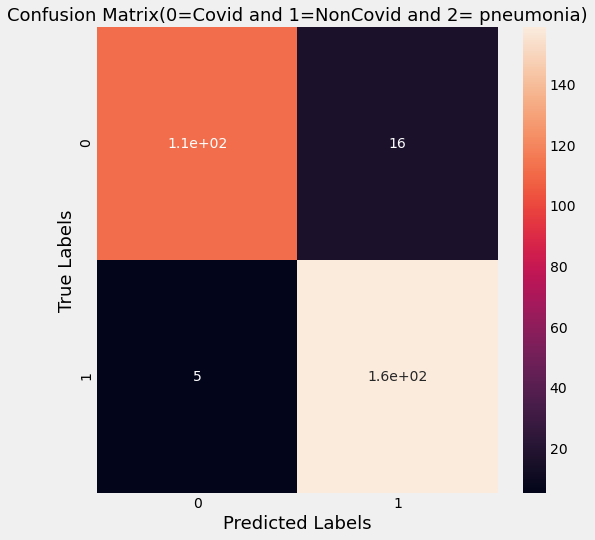

In [365]:
import seaborn as sns 
plt.style.use('fivethirtyeight')
matrix = confusion_matrix(testY.argmax(axis=1), predIdxs)
plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax)

diretorio_save ='{0}/{1}{2}.png'.format(diretorio_save_model_imagens,'Confusion Matrix',config.NomeModelo)

ax.set_xlabel('Predicted Labels',size=18)
ax.set_ylabel('True Labels',size=18)
ax.set_title('Confusion Matrix(0=Covid and 1=NonCovid and 2= pneumonia)',size=18)


plt.savefig(diretorio_save)


total = sum(sum(matrix))

acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


## Em seguida, plotamos nosso histórico de precisão / perda de treinamento para inspeção, produzindo o plot para um arquivo de imagem:

In [ ]:

config.to_dict()



In [ ]:
# traçar a perda e a precisão do treinamento
# plot the training loss and accuracy

diretorio_saveplot ='{0}/{1}_plot.png'.format(diretorio_save_model_imagens,config.NomeModelo)

N = config.EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(diretorio_saveplot)

## Agora Salvamos o modelo 

In [ ]:
diretorio_save_model_imagens

In [ ]:
# serialize the model to disk
model.save('{0}/{1}'.format(diretorio_save_model_imagens,config.NomeModelo))

## Validação de novas imagens

In [ ]:
output_model =r'{0}\{1}'.format(diretorio_raiz,'base_conhecimento')

In [ ]:
from tensorflow.keras.models import load_model
# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('{0}/{1}'.format(diretorio_save_model_imagens,config.NomeModelo))

# Show the model architecture
new_model.summary()

## informações do modelo selecionado


In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = new_model.predict(testX, batch_size=config.BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

## Teste de imagem com Covid


In [ ]:
def getArrayFromImage(var_imagem):
    test_image = cv2.imread(var_imagem)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image = cv2.resize(test_image, (224, 224))
    imagem_array = np.expand_dims(test_image, axis = 0)

    return imagem_array,test_image


In [ ]:
import random as r
var_imagem = r.choice(lista_imagens_com_Covid)

imagem_array,image  = getArrayFromImage(var_imagem)


In [ ]:
var_imagem

In [ ]:
{'covid', 'normal', 'pneumonia'}

## executando a predição de uma nova imagem

In [ ]:

pred = new_model.predict(imagem_array)
print(pred)

In [ ]:




print(np.argmax(pred, axis=1)[0])
if pred[0][0] == 1:
  plt.title('Prediction: Covid-19')
elif pred[0][1] == 1:
  plt.title('Prediction: normal')
elif pred[0][2] == 1:
  plt.title('Prediction: pneumonia')
      
plt.imshow(image)
    






In [ ]:
labels=['covid','normal','pneumonia']
plt.figure(figsize =(40,40))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(labels[(np.argmax(testY[i], axis=0))])
    plt.imshow(trainX.reshape(-1,224,224,3)[i])
    
    if(predIdxs[i]==(np.argmax(testY[i], axis=0))):
        plt.xlabel(labels[predIdxs[i]],color='blue')
    else:
        plt.xlabel(labels[predIdxs[i]],color='red')
plt.show()

## Diagnóstico automático de COVID-19 a partir de resultados de imagens de raios-X

### Como você pode ver nos resultados acima, nosso detector COVID-19 automático está obtendo ~ 90-92% de precisão em nosso conjunto de dados de amostra com base apenas em imagens de raios-X  - nenhum outro dado, incluindo localização geográfica, densidade populacional etc. foi usado para treinar esse modelo.


### Também estamos obtendo 100% de sensibilidade e 80% de especificidade, o que implica que:

### Dos pacientes que fazem tem COVID-19 (ou seja, verdadeiros positivos), poderíamos identificá-los com precisão como “COVID-19 positiva” 100% do tempo , usando o nosso modelo.

### Dos pacientes que não têm COVID-19 (isto é, verdadeiros negativos), poderíamos identificá-los com precisão como "COVID-19 negativo" apenas 80% do tempo usando nosso modelo.

## Ser capaz de detectar com precisão o COVID-19 com 100% de precisão é ótimo; no entanto, nossa verdadeira taxa negativa é um pouco preocupante  - não queremos classificar alguém como "COVID-19 negativo" quando é "COVID-19 positivo".

## De fato, a última coisa que queremos fazer é dizer a um paciente que eles são negativos para COVID-19 e depois levá-los para casa e infectar sua família e amigos; transmitindo assim a doença ainda mais.

## Também queremos ter muito cuidado com nossa taxa de falsos positivos  - não queremos classificar erroneamente alguém como "positivo para COVID-19" , colocá-lo em quarentena com outros pacientes positivos para COVID-19 e infectar uma pessoa que nunca teve realmente o problema. vírus.

## Equilibrar sensibilidade e especificidade é incrivelmente desafiador quando se trata de aplicações médicas, especialmente doenças infecciosas que podem ser transmitidas rapidamente, como o COVID-19.

# Limitações


In [ ]:
Uma das maiores limitações do método discutido neste tutorial são os dados.

Simplesmente não temos dados suficientes (confiáveis) para treinar um detector COVID-19.

Os hospitais já estão sobrecarregados com o número de casos COVID-19 e, dados os direitos e a confidencialidade dos pacientes, fica ainda mais difícil montar conjuntos de dados de imagens médicas de qualidade em tempo hábil.

Imagino que nos próximos 12 a 18 meses teremos mais conjuntos de dados de imagem COVID-19 de alta qualidade; mas, por enquanto, só podemos nos contentar com o que temos.